# Thymio museum guard

## Import necessary libraries

In [1]:
from modules.cv import Camera, get_robot_info, get_map_info
from modules.utils import plot_map
from definitions import *

## Setup environment

### Setup camera and capture map (for production environment)

2024-12-05 19:04:13.697 Python[55613:15457727] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.


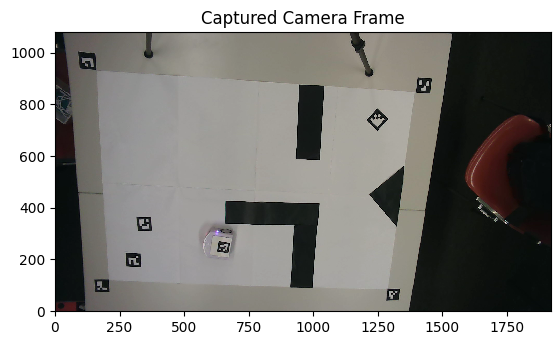

In [2]:
camera = Camera()

map_frame = camera.get_frame()

map_frame = camera.get_frame()

plot_map(
    map_frame,
    title="Captured Camera Frame"
)

### (Optional) Capture map from file

In [3]:
# map_frame = cv2.imread("resources/map_captures/map5.jpeg")

### Setup map

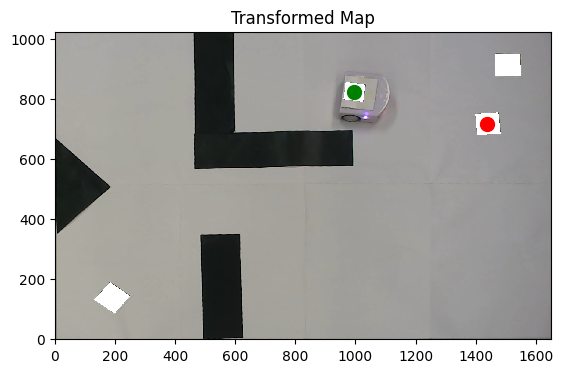

Robot pose: 821.2344970703125 994.7769775390625 -0.11644960194826126
Robot goal: 715.3734741210938 1438.088134765625
Map shape: 1024 1651
Checkpoints: [[1504.7219   910.9235 ]
 [ 190.05316  136.80649]]


In [ ]:
map_info = get_map_info(
    map_frame,
    target_scale=MAP_TARGET_SCALE,
    descretize_scale=DESCRITIZE_SCALE,
    descretize_threshold=DESCRITIZE_THRESHOLD,        # This number needs to be changed based on the environment
    aruco_cm=ARUCO_SIZE_CM
)

robot_info = get_robot_info(
    map_frame,
    map_info.original_width,
    map_info.original_height
)

plot_map(
    map_info.original_map,
    robot_pos=(robot_info.robot_x, robot_info.robot_y),
    target_pos=(robot_info.goal_x, robot_info.goal_y),
    title="Transformed Map",
)

print("Robot pose:", robot_info.robot_x, robot_info.robot_y, robot_info.robot_theta)
print("Robot goal:", robot_info.goal_x, robot_info.goal_y)
print("Map shape:", map_info.original_height, map_info.original_width)
print("Checkpoints:", robot_info.checkpoint_list)

## Main Logic

In [5]:
from modules.main_logic import MainLogic

logic = MainLogic()
logic.run()

33
Waiting for the robot to be visible...
Waiting for the robot to be connected...
Robot connected.
Controller initialized
Current position (819.781005859375, 995.9305419921875)
Going to [1505.0248   911.34393]
Stopping the robot
Current position [821.01708984 994.96929932]
Going to (1439.163330078125, 713.9963989257812)


2024-12-05 19:04:20.261 Python[55613:15457727] ApplePersistenceIgnoreState: Existing state will not be touched. New state will be written to /var/folders/wz/pcc99phj5615zw08hw7h80lc0000gn/T/org.python.python.savedState
2024-12-05 19:04:22.273 Python[55613:15457727] +[IMKClient subclass]: chose IMKClient_Modern
2024-12-05 19:04:22.273 Python[55613:15457727] +[IMKInputSession subclass]: chose IMKInputSession_Modern


Reached the end of the path
Stopping the robot
Current position [ 729.7019526  1411.45147958]
Going to [190.23088 135.66693]
Stopping the robot
Current position [ 550.87287238 1237.76473512]
Going to (1429.3450927734375, 211.28466796875)
Reached the end of the path
Stopping the robot
Current position [ 233.98065197 1422.26656502]
Going to [1505.0248   911.34393]
Reached the end of the path
Stopping the robot
Current position [ 878.59709502 1499.52000809]
Going to [190.23088 135.66693]
WANRNING! Could not detect all markers
WANRNING! Could not detect all markers
WANRNING! Could not detect all markers
Stopping the robot
Current position [440.82612792 867.11275959]
Going to (1026.007080078125, 845.2061157226562)
Reached the end of the path
Stopping the robot
Current position [ 836.65457347 1039.84490019]
Going to [1505.0248   911.34393]
Reached the end of the path
Stopping the robot
Current position [ 923.35006283 1493.06449267]
Going to [190.23088 135.66693]
WANRNING! Could not detect al

KeyboardInterrupt: 

# Terminate all cv2 windows

In [ ]:
cv2.destroyAllWindows()